In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [65]:
data= pd.read_csv('WHO-COVID-19-global-data (3).csv') #reading the dataset
data.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [66]:
data.tail() #last five records

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
198601,2022-04-15,ZW,Zimbabwe,AFRO,48,247208,2,5462
198602,2022-04-16,ZW,Zimbabwe,AFRO,29,247237,0,5462
198603,2022-04-17,ZW,Zimbabwe,AFRO,24,247261,0,5462
198604,2022-04-18,ZW,Zimbabwe,AFRO,17,247278,1,5463
198605,2022-04-19,ZW,Zimbabwe,AFRO,19,247297,1,5464


In [67]:
data.shape

(198606, 8)

In [180]:
print("number of NaN values for the column Date_reported :", data['Date_reported'].isnull().sum())
print("number of NaN values for the column Country_code:", data['Country_code'].isnull().sum())
print("number of NaN values for the column Country:", data['Country'].isnull().sum())
print("number of NaN values for the column WHO_region:", data['WHO_region'].isnull().sum())
print("number of NaN values for the column New_cases:", data['New_cases'].isnull().sum())
print("number of NaN values for the column Cumulative_cases:", data['Cumulative_cases'].isnull().sum())
print("number of NaN values for the column New_deaths:", data['New_deaths'].isnull().sum())
print("number of NaN values for the column Cumulative_deaths:", data['Cumulative_deaths'].isnull().sum())

number of NaN values for the column Date_reported : 0
number of NaN values for the column Country_code: 0
number of NaN values for the column Country: 0
number of NaN values for the column WHO_region: 0
number of NaN values for the column New_cases: 0
number of NaN values for the column Cumulative_cases: 0
number of NaN values for the column New_deaths: 0
number of NaN values for the column Cumulative_deaths: 0


In [179]:
data.replace('?',np.nan, inplace=True)
data.dropna(inplace=True)

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [182]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.977680e+05,1.977680e+05,197768.000000,197768.000000
mean,2.543252e+03,6.059476e+05,31.332415,11592.654889
std,1.675399e+04,3.246818e+06,164.988620,54083.469348
min,-3.295200e+04,0.000000e+00,-2452.000000,0.000000
25%,0.000000e+00,1.830000e+02,0.000000,2.000000
50%,2.400000e+01,1.101900e+04,0.000000,145.000000
75%,5.160000e+02,1.608108e+05,6.000000,2659.000000
max,1.252717e+06,7.989615e+07,11447.000000,981415.000000


In [183]:
data.corr(method='pearson') #Pearson corelation

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.576643,0.569329,0.499686
Cumulative_cases,0.576643,1.000000,0.534999,0.913828
New_deaths,0.569329,0.534999,1.000000,0.592858
Cumulative_deaths,0.499686,0.913828,0.592858,1.000000


From the correlation coefficent, it appears that the column New_cases has low correlation to Cumulative_cases, New_deaths and Cumulative_deaths.

In [184]:
print(data.dtypes)

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object


<AxesSubplot:>

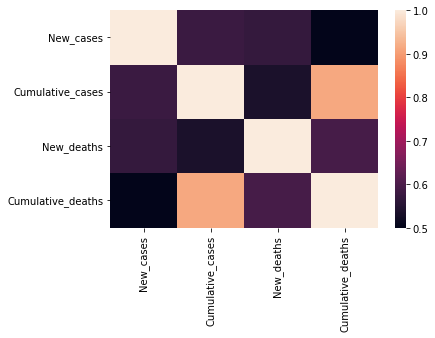

In [186]:
df = data.corr(method='pearson') #heatmap for pearson correlation 
sns.heatmap(df)

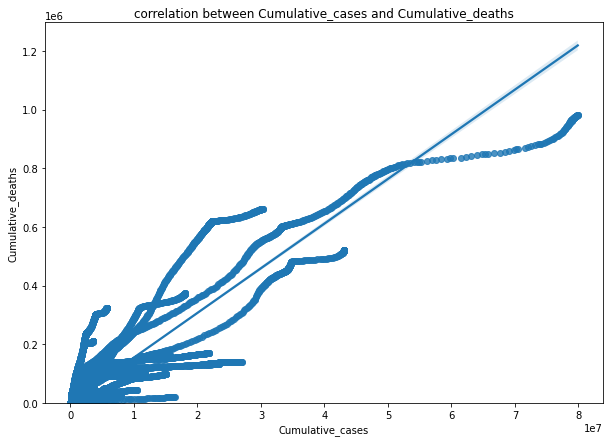

In [170]:
plt.figure(figsize=(10,7)) # Correlation btween cumulative cases and cumulative deaths
sns.regplot(x = 'Cumulative_cases', y = 'Cumulative_deaths', data = data)
plt.ylim(0,) 
plt.title("correlation between Cumulative_cases and Cumulative_deaths")
plt.show()

In [173]:
#Finding the slope of the line, the y intercept and best fit simple linear regression line.
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 0.02.
The y-intercept is 2360.69.
The best fit simple linear regression line is 0.02x + 2360.69.


In [174]:
#Finding Centroid 
y_mean = y.mean()  
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 603644.00 and y = 11549.60.


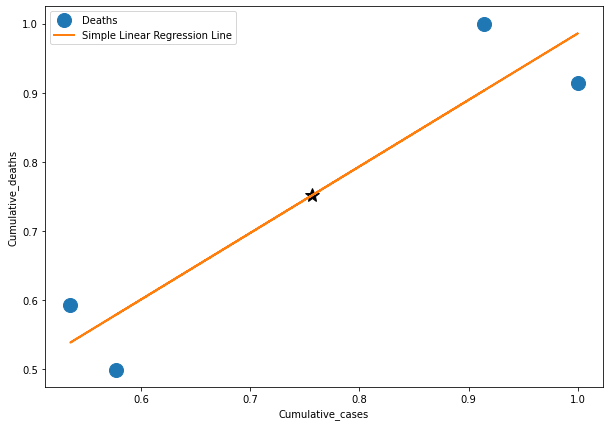

In [134]:
#regression line and the centroid point on the plot

%matplotlib inline

plt.figure(figsize=(10,7))

#scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Deaths") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 15, color = "k") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 2)

# Create the x and y axis labels
plt.ylabel('Cumulative_deaths', fontsize = 10)
plt.xlabel('Cumulative_cases', fontsize = 10)

# Enlarge x and y tick marks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper left', fontsize = 10)

In [190]:
#Poloynomial
order = 1
p = np.poly1d(np.polyfit(x, y ,order))
print('The array p(x) Deaths the calculated y value from the polynomial model for each x value,\n\n{}.'.format(p(x)))
print('\nThe vector of coefficients p describes this regression model:\n{}'.format(p))
print('\nThe zeroth order term (y-intercept or b) is stored in p[0]: {}.'.format(p[0]))
print('\nThe first order term (slope or m) is stored in p[1]: {}.'.format(p[1]))

The array p(x) Deaths the calculated y value from the polynomial model for each x value,

[2360.69335471 2360.69335471 2360.69335471 ... 6124.59928495 6124.85806575
 6125.14729136].

The vector of coefficients p describes this regression model:
 
0.01522 x + 2361

The zeroth order term (y-intercept or b) is stored in p[0]: 2360.693354712429.

The first order term (slope or m) is stored in p[1]: 0.015222400339054426.


In [191]:
#Finding r^2
from sklearn.metrics import r2_score
r2 = r2_score(y, p(x))
r2

0.8351005315633218

In [192]:
#Finding Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, p(x))
mse

480370881.7878995

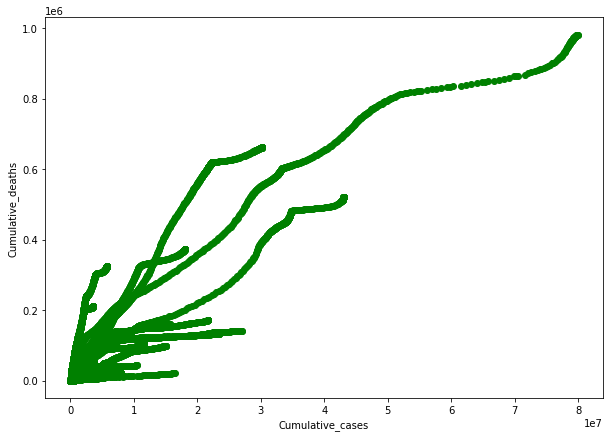

In [137]:
#Scatter plot of Cumulative against cumulative deaths
plt.figure(figsize=(10,7))
plt.scatter(data.Cumulative_cases, data.Cumulative_deaths,  color='green')
plt.xlabel("Cumulative_cases")
plt.ylabel("Cumulative_deaths")
plt.show()

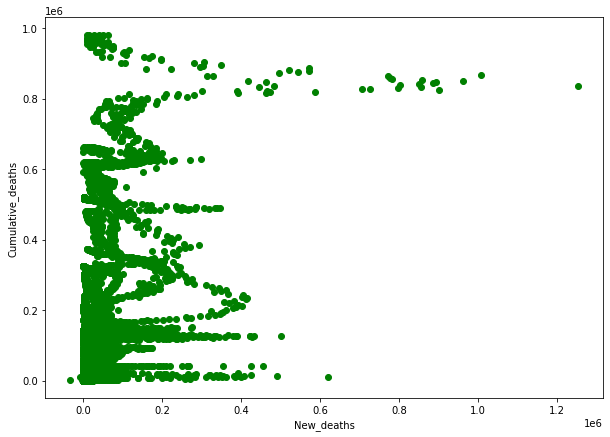

In [193]:
# Scatter plot of new deaths against cumulative deaths

plt.figure(figsize=(10,7))
plt.scatter(data.New_cases, data.Cumulative_deaths,  color='green')
plt.xlabel("New_deaths")
plt.ylabel("Cumulative_deaths")
plt.show()

In [117]:
# Finding the coefficients and the intercept

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(data[['Cumulative_deaths']])
train_y = np.asanyarray(data[['Cumulative_cases']])
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[54.85997694]]
Intercept:  [-29967.0082232]


Text(0, 0.5, 'Cumulative_deaths')

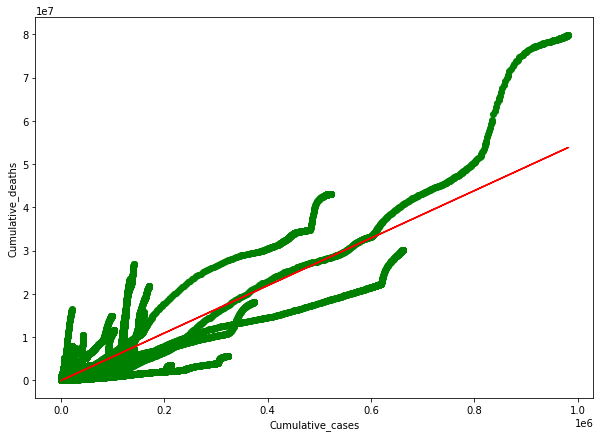

In [135]:
plt.figure(figsize=(10,7))
plt.scatter(data.Cumulative_deaths, data.Cumulative_cases,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Cumulative_cases")
plt.ylabel("Cumulative_deaths")

In [127]:
# Calculating the errors

from sklearn.metrics import r2_score
test_x = np.asanyarray(data[['Cumulative_deaths']])
test_y = np.asanyarray(data[['Cumulative_cases']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 295210.86
Residual sum of squares (MSE): 1731207622338.49
R2-score: 0.80


<b> Simple linear regression </b>

In [128]:
from scipy import stats

In [129]:
# Finding the p values between cumulative deaths and cumulative cases

pearson_coef, p_value = stats.pearsonr(data['Cumulative_deaths'], data['Cumulative_cases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9138383508932866  with a P-value of P = 0.0


In [194]:
# Finding the p values between new deaths and cumulative cases

pearson_coef, p_value = stats.pearsonr(data['New_deaths'], data['Cumulative_cases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5349989450184017  with a P-value of P = 0.0


In [195]:
from sklearn.linear_model import LinearRegression

In [141]:
lm = LinearRegression()
X = data[['Cumulative_deaths']]
Y = data['Cumulative_cases']

In [142]:
lm.fit(X,Y)

LinearRegression()

In [196]:
# Linear regression

X = data[['Cumulative_cases']]
Y = data['Cumulative_deaths']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X,Y)

0.8350810982362411

In [143]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([-29967.0082232, -29967.0082232, -29967.0082232, -29967.0082232,
       -29967.0082232])

In [144]:
lm.intercept_

-29967.00822319789

In [145]:
lm.coef_

array([54.85997694])

In [147]:
# Values of the intercept and Value of slope

lm0 = LinearRegression()

lm0.fit( data[['Cumulative_deaths']], data['Cumulative_cases'])
print("Value of the intercept \n {}".format(lm0.intercept_))
print("Value of the Slope \n {}".format(lm0.coef_))

Value of the intercept 
 -29967.00822319789
Value of the Slope 
 [54.85997694]


In [197]:
# Finding R-Square

X = data[['Cumulative_cases']]
Y = data['Cumulative_deaths']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8350810982362411


In [198]:
# Finding the mean squared error

Yhat=lm.predict(X)
mse = mean_squared_error(data['Cumulative_deaths'], Yhat)
print('The mean squared error of price and predicted value is: ', mse)

The mean squared error of price and predicted value is:  482388920.0745983


<b> Multiple linear </b>

In [199]:
# Finding the estimated linear model of cumulative deaths, cumulative cases, new cases and new deaths

lm1 = LinearRegression() 
Z = data[['Cumulative_deaths', 'Cumulative_cases', 'New_cases', 'New_deaths']] 

lm1.fit(Z, data['Cumulative_deaths'])
print("Value of the intercept \n {}".format(lm1.intercept_))
print("Values of the coefficients (b1, b2, b3, b4) \n {}".format(lm1.coef_))
print("\n Final estimated linear model")
print(f"\n Cumulative_deaths = {lm1.intercept_} + {lm1.coef_[0]}*Cumulative_cases + {lm1.coef_[1]}*New_deaths + {lm1.coef_[2]}*New_cases")

Value of the intercept 
 -5.475158104673028e-10
Values of the coefficients (b1, b2, b3, b4) 
 [ 1.00000000e+00 -2.97253893e-16  2.24570370e-17  3.55780793e-15]

 Final estimated linear model

 Cumulative_deaths = -5.475158104673028e-10 + 1.0000000000000628*Cumulative_cases + -2.972538933714925e-16*New_deaths + 2.245703698996974e-17*New_cases


In [159]:
# Finding the estimated linear model of cumulative deaths and new cases and new deaths

lm2 = LinearRegression()
lm2.fit(data[['New_deaths','New_cases']],data['Cumulative_deaths']) 
print("Value of the intercept \n {}".format(lm2.intercept_))
print("Values of the coefficients (b1, b2,) \n {}".format(lm2.coef_))
print("\n Estimated linear model")
print(f"\n Cumulative_deaths = {lm2.intercept_} + {lm2.coef_[0]}*Cumulative_cases  {lm2.coef_[1]}*New_cases")

Value of the intercept 
 4917.588463844475
Values of the coefficients (b1, b2,) 
 [149.5728511    0.77459021]

 Estimated linear model

 Cumulative_deaths = 4917.588463844475 + 149.57285109655714*Cumulative_cases  0.7745902093984259*New_cases


In [202]:
# Finding the R - Square

lm.fit(Z, data['Cumulative_deaths'])

print('The R-square is: ', lm.score(Z, data['Cumulative_deaths']))

The R-square is:  1.0


In [203]:
# Finding mean squared error

Y_predict_multifit = lm.predict(Z)
print('The mean square error of Cumulative_deaths and predicted value using multifit is: ', \
      mean_squared_error(data['Cumulative_deaths'], Y_predict_multifit))

The mean square error of Cumulative_deaths and predicted value using multifit is:  6.482961619098565e-18
